# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 159418353
sectors = np.array([14,19,20,21,25,26,40,41,47])

period = 8.3033400956
tdepth = 0.00045843878315290904

lc_file = "TOI_1739_S14_19_20_21_25_26_40_41_47.csv"
contrastcurve_file = "TOI_1739_832nm.csv"

band = 'TESS'

# Downloading & Visualizing Data

In [5]:
target = tr.target(ID=ID, sectors=sectors)

Sector 14


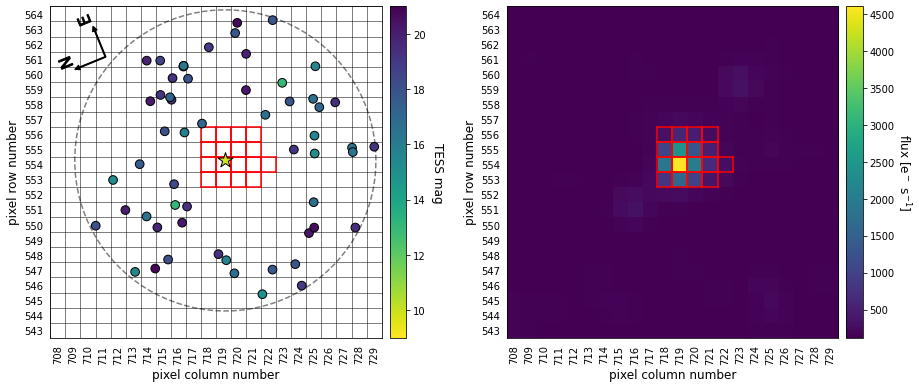

Sector 19


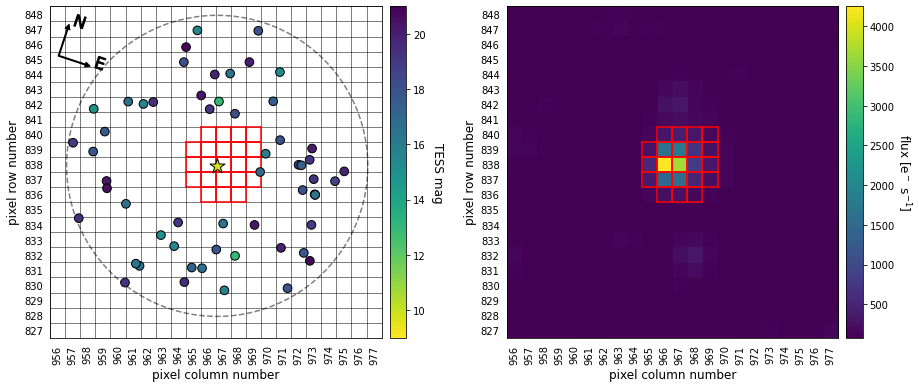

Sector 20


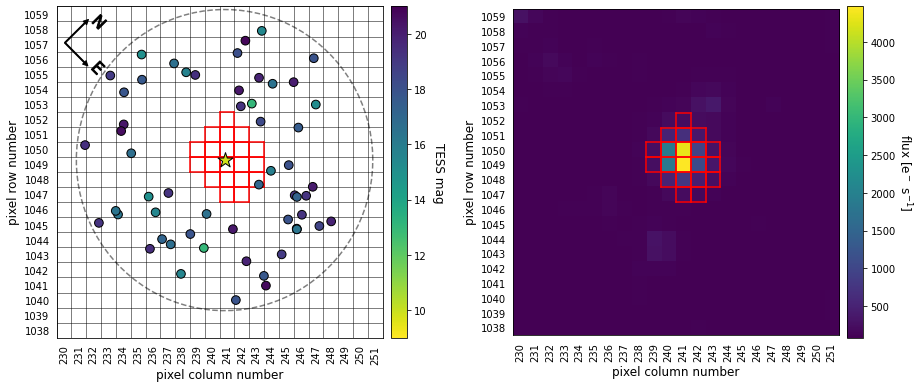

Sector 21


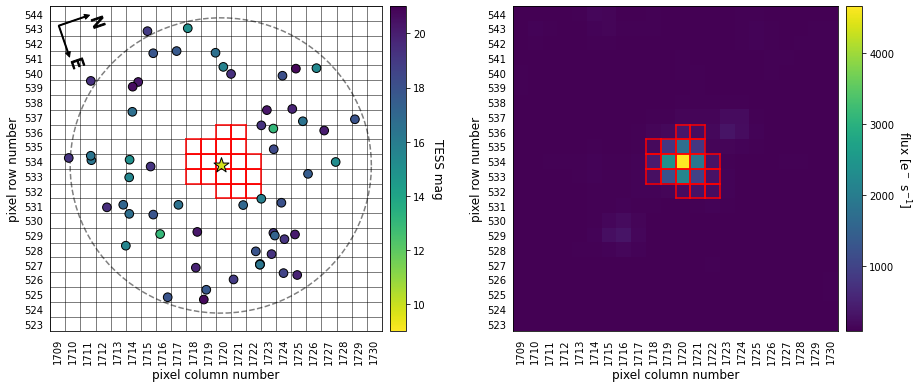

Sector 25


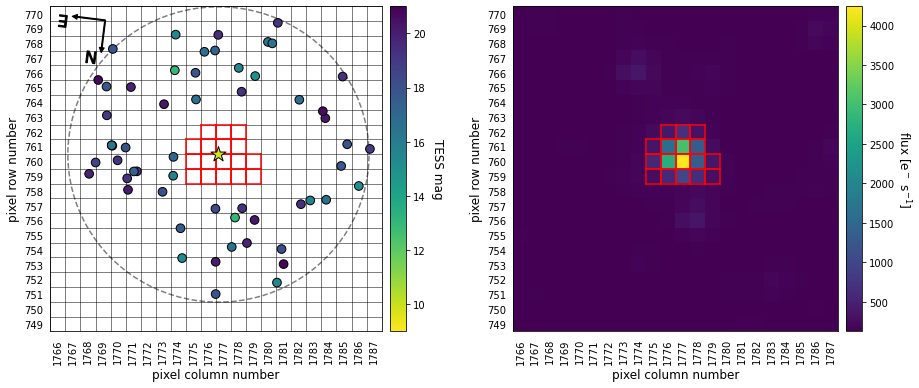

Sector 26


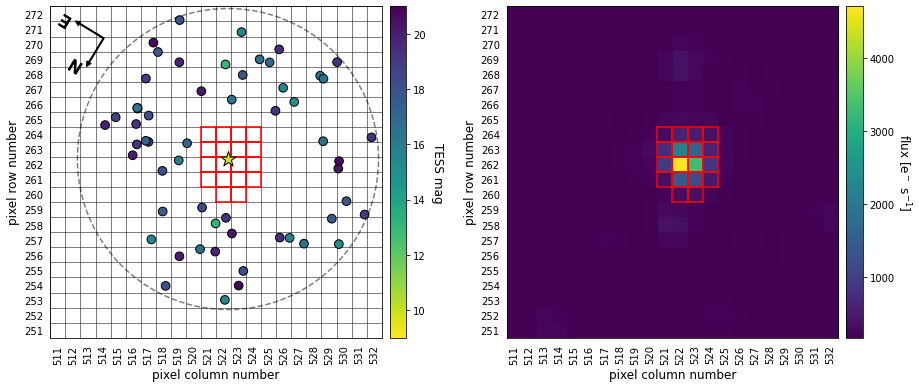

Sector 40


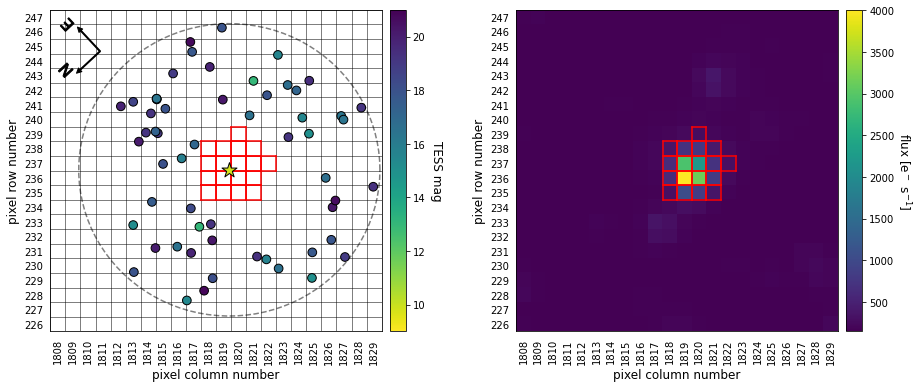

Sector 41


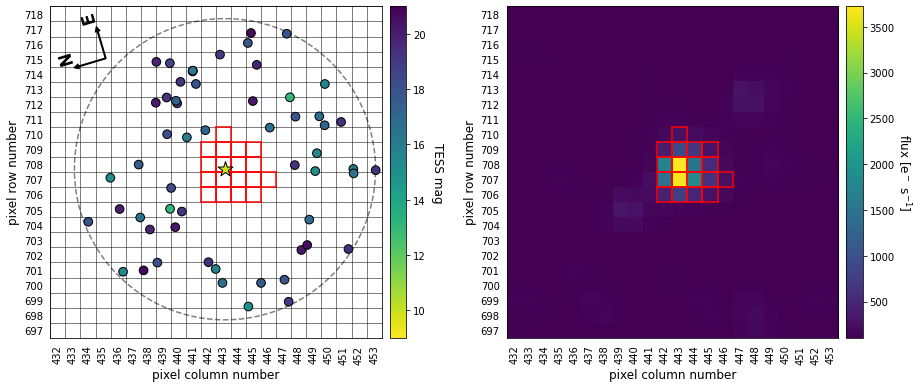

Sector 47


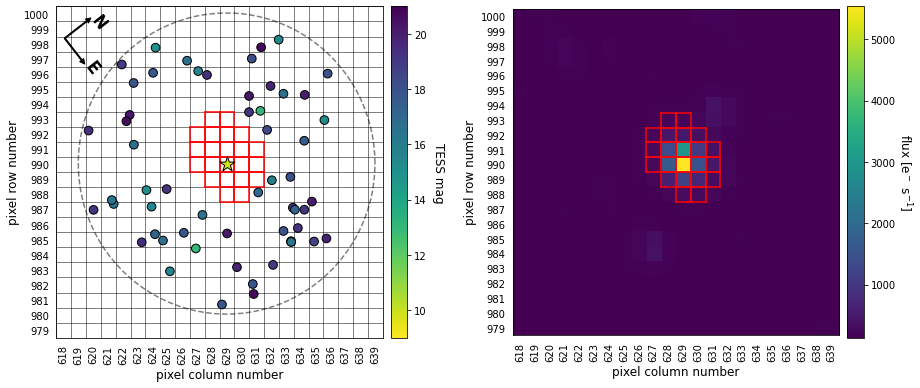

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,159418353,9.8120,8.982,8.514,8.388,240.177356,83.258195,0.780000,0.780707,4814.0,14.059200,0.000,0.000
1,159419748,17.0304,16.009,15.290,15.486,240.315003,83.261069,0.700000,0.625217,4477.0,0.762071,59.074,79.845
2,159419749,15.8897,15.046,14.720,14.635,240.311858,83.268172,0.970000,1.282090,5531.0,0.382209,67.205,57.627
3,1201408713,18.2947,NaN,NaN,NaN,240.174296,83.278687,0.590000,0.461895,3857.0,0.817855,73.783,358.999
4,1201408714,19.2513,NaN,NaN,NaN,240.092069,83.277326,NaN,NaN,NaN,0.780334,77.710,332.450
5,159419746,16.5671,15.324,14.605,14.530,240.258408,83.238534,0.585141,0.596399,3862.0,1.262620,78.652,154.101
6,159418357,13.0466,12.364,12.024,11.982,240.111926,83.281123,1.070000,2.329960,5885.0,0.745244,87.034,341.540
7,1201408712,18.0320,NaN,NaN,NaN,240.341134,83.274667,0.900000,0.499236,5241.0,0.268770,91.081,49.297
8,1201408708,19.2061,NaN,NaN,NaN,240.120521,83.233616,0.630000,0.443074,4046.0,-0.081412,91.697,195.242
9,1201408700,20.2183,NaN,NaN,NaN,240.355351,83.241706,NaN,NaN,NaN,-0.132061,95.896,128.154


In [6]:
ap14 = np.array([[718,553],[719,553],[720,553],[721,553],[718,554],[719,554],
                 [720,554],[721,554],[722,554],[718,555],[719,555],[720,555],
                 [721,555],[718,556],[719,556],[720,556],[721,556]])

ap19 = np.array([[966,836],[967,836],[968,836],[965,837],[966,837],[967,837],
                 [968,837],[969,837],[965,838],[966,838],[967,838],[968,838],
                 [969,838],[965,839],[966,839],[967,839],[968,839],[969,839],
                 [966,840],[967,840],[968,840],[969,840]])

ap20 = np.array([[241,1047],[242,1047],[240,1048],[241,1048],[242,1048],[243,1048],
                 [239,1049],[240,1049],[241,1049],[242,1049],[243,1049],[239,1050],
                 [240,1050],[241,1050],[242,1050],[243,1050],[240,1051],[241,1051],
                 [242,1051],[241,1052]])

ap21 = np.array([[1720,532],[1721,532],[1722,532],[1718,533],[1719,533],[1720,533],
                 [1721,533],[1722,533],[1718,534],[1719,534],[1720,534],[1721,534],
                 [1722,534],[1718,535],[1719,535],[1720,535],[1721,535],[1720,536],
                 [1721,536]])

ap25 = np.array([[1775,759],[1776,759],[1777,759],[1778,759],[1779,759],[1775,760],
                 [1776,760],[1777,760],[1778,760],[1779,760],[1775,761],[1776,761],
                 [1777,761],[1778,761],[1776,762],[1777,762],[1778,762]])

ap26 = np.array([[522,260],[523,260],[521,261],[522,261],[523,261],[524,261],
                 [521,262],[522,262],[523,262],[524,262],[521,263],[522,263],
                 [523,263],[524,263],[521,264],[522,264],[523,264],[524,264]])

ap40 = np.array([[1818,235],[1819,235],[1820,235],[1821,235],[1818,236],[1819,236],
                 [1820,236],[1821,236],[1818,237],[1819,237],[1820,237],[1821,237],
                 [1822,237],[1818,238],[1819,238],[1820,238],[1821,238],[1820,239]])

ap41 = np.array([[442,706],[443,706],[444,706],[445,706],[442,707],[443,707],
                 [444,707],[445,707],[446,707],[442,708],[443,708],[444,708],
                 [445,708],[442,709],[443,709],[444,709],[445,709],[443,710]])

ap47 = np.array([[629,988],[630,988],[628,989],[629,989],[630,989],[631,989],
                 [627,990],[628,990],[629,990],[630,990],[631,990],[627,991],
                 [628,991],[629,991],[630,991],[631,991],[627,992],[628,992],
                 [629,992],[630,992],[628,993],[629,993]])

apertures = np.array([ap14, ap19, ap20, ap21, ap25, ap26, ap40, ap41, ap47])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [7]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,159418353,9.8120,8.982,8.514,8.388,240.177356,83.258195,0.780000,0.780707,4814.0,14.059200,0.000,0.000,9.986157e-01,0.000459
1,159419748,17.0304,16.009,15.290,15.486,240.315003,83.261069,0.700000,0.625217,4477.0,0.762071,59.074,79.845,3.394720e-04,0.000000
2,159419749,15.8897,15.046,14.720,14.635,240.311858,83.268172,0.970000,1.282090,5531.0,0.382209,67.205,57.627,5.277415e-04,0.868680
3,1201408713,18.2947,NaN,NaN,NaN,240.174296,83.278687,0.590000,0.461895,3857.0,0.817855,73.783,358.999,1.966571e-05,0.000000
4,1201408714,19.2513,NaN,NaN,NaN,240.092069,83.277326,NaN,NaN,NaN,0.780334,77.710,332.450,7.235624e-06,0.000000
5,159419746,16.5671,15.324,14.605,14.530,240.258408,83.238534,0.585141,0.596399,3862.0,1.262620,78.652,154.101,4.643680e-05,0.000000
6,159418357,13.0466,12.364,12.024,11.982,240.111926,83.281123,1.070000,2.329960,5885.0,0.745244,87.034,341.540,4.372014e-04,0.000000
7,1201408712,18.0320,NaN,NaN,NaN,240.341134,83.274667,0.900000,0.499236,5241.0,0.268770,91.081,49.297,4.599749e-06,0.000000
8,1201408708,19.2061,NaN,NaN,NaN,240.120521,83.233616,0.630000,0.443074,4046.0,-0.081412,91.697,195.242,9.872138e-07,0.000000
9,1201408700,20.2183,NaN,NaN,NaN,240.355351,83.241706,NaN,NaN,NaN,-0.132061,95.896,128.154,1.304778e-07,0.000000


In [8]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

2 159419749


In [9]:
#target.stars['tdepth'][1] = 0
target.stars['tdepth'][2] = 0

# Ploting CC File

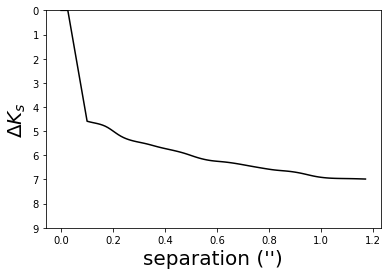

In [10]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

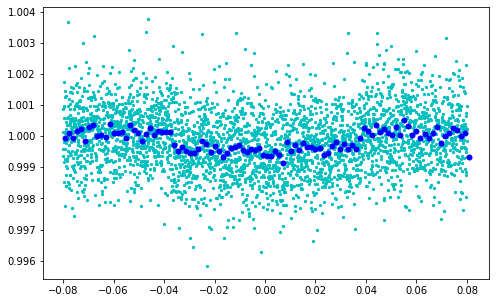

In [11]:
lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [12]:
%%time
for i in range(4):
    print(i + 1)
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889)

    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

1
Calculating TP scenario probabilitiey for 159418353.
Calculating EB and EBx2P scenario probabilities for 159418353.
Calculating PTP scenario probability for 159418353.
Calculating PEB and PEBx2P scenario probabilities for 159418353.
Calculating STP scenario probability for 159418353.
Calculating SEB and SEBx2P scenario probabilities for 159418353.
Calculating DTP scenario probability for 159418353.
Calculating DEB and DEBx2P scenario probabilities for 159418353.
Calculating BTP scenario probability for 159418353.
Calculating BEB and BEBx2P scenario probabilities for 159418353.
FPP =  0.0019762185078479044
NFPP =  0.0
2
Calculating TP scenario probabilitiey for 159418353.
Calculating EB and EBx2P scenario probabilities for 159418353.
Calculating PTP scenario probability for 159418353.
Calculating PEB and PEBx2P scenario probabilities for 159418353.
Calculating STP scenario probability for 159418353.
Calculating SEB and SEBx2P scenario probabilities for 159418353.
Calculating DTP scena

In [13]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.001397224541118458
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,159418353,TP,0.780000,0.780707,8.30334,88.620319,0.457046,0.503809,336.585378,1.693411,0.000000,0.000000,9.328362e-01
1,159418353,EB,0.780000,0.780707,8.30334,84.094448,1.652166,0.379594,61.925469,0.000000,0.674768,0.702829,7.292665e-36
2,159418353,EBx2P,0.780000,0.780707,16.60668,87.885550,1.510499,0.454406,208.424302,0.000000,0.750413,0.780658,1.355377e-15
3,159418353,PTP,0.780000,0.780707,8.30334,88.208108,0.423552,0.478300,19.346858,1.690838,0.000000,0.000000,2.722846e-02
4,159418353,PEB,0.780000,0.780707,8.30334,83.989917,1.685486,0.382264,59.290691,0.000000,0.675441,0.703605,4.353858e-36
5,159418353,PEBx2P,0.780000,0.780707,16.60668,88.066577,0.588692,0.676028,157.587294,0.000000,0.748638,0.778986,1.355381e-12
6,159418353,STP,0.753519,0.780707,8.30334,87.431616,0.961202,0.415314,327.352926,2.598353,0.000000,0.000000,1.389879e-03
7,159418353,SEB,0.116995,0.143105,8.30334,89.372620,0.778356,0.541744,220.035501,0.000000,0.043660,0.100000,2.643900e-12
8,159418353,SEBx2P,0.426186,0.425648,16.60668,88.631572,0.590459,0.668980,148.132537,0.000000,0.407172,0.408508,1.687582e-08
9,159418353,DTP,0.780000,0.780707,8.30334,87.773254,0.990590,0.564496,306.074383,1.709392,0.000000,0.000000,3.853812e-02


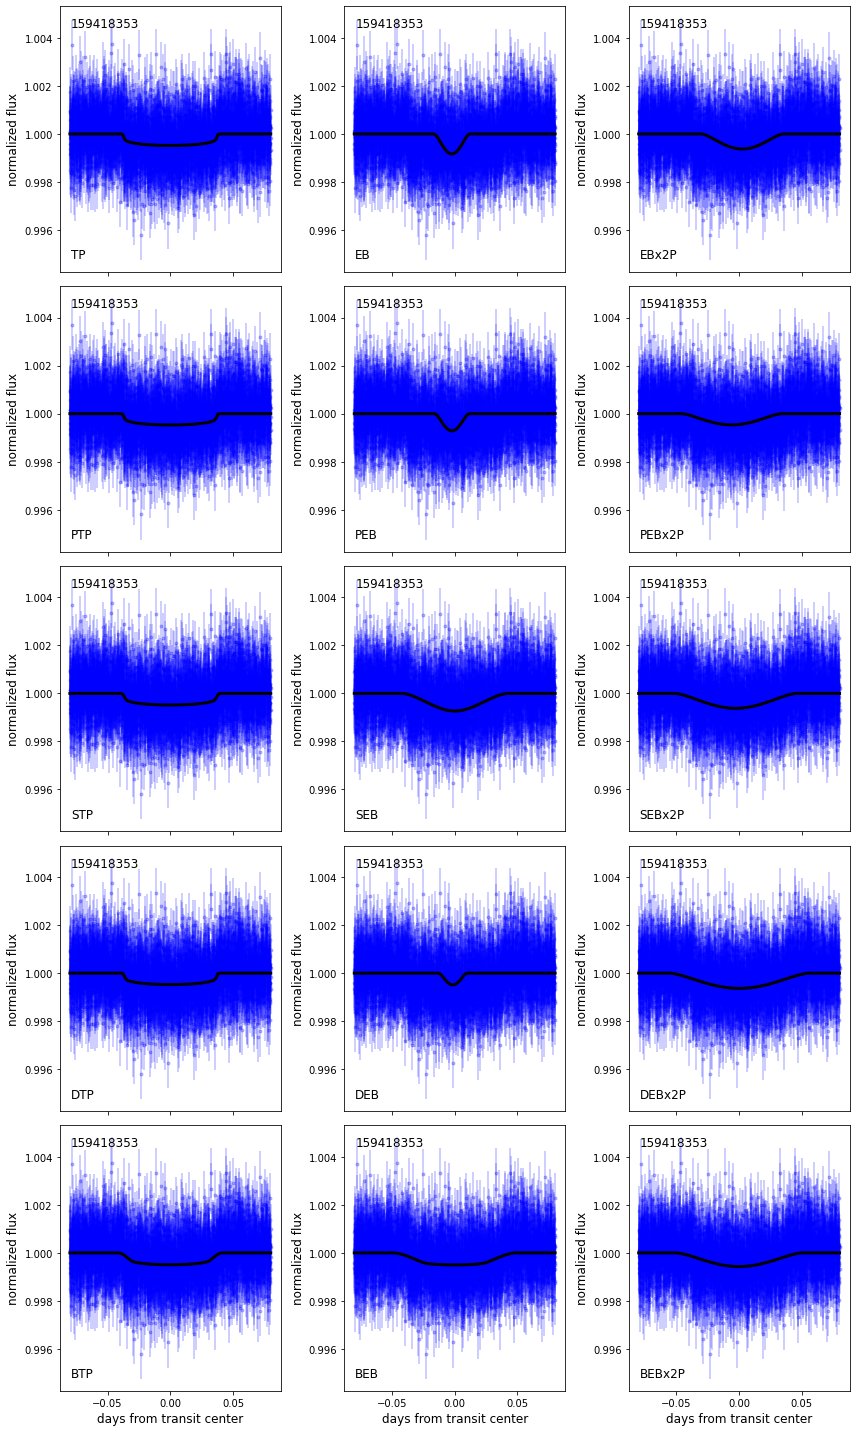

In [14]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [15]:
# 562 nm
FPP = np.array([0.004981568452969265,0.005404858447189742,0.0036761610789194377,0.005757259095833911,
                0.004715727638656131,0.006063146863085955,0.005373030883757179,0.004914968103437056,
                0.005714193628590047,0.003709356141554876,0.0043459526532129145,0.005282995503633314,
                0.006362285187277883,0.007991211314380187,0.004946946223480908,0.005910102617530999,
                0.0040178659470013756,0.005875969771986345,0.004057170567560386,0.0053101044399122])

print("Filter: 562 nm")
print("Mean : ",np.mean(FPP))
print("Standard Deviation :",np.std(FPP))

Filter: 562 nm
Mean :  0.0052205437279985055
Standard Deviation : 0.0009977447859388089


In [15]:
# 832 nm
FPP = np.array([0.0019552886922346024,0.001442849816850389,0.001945184481870199,0.0017018311436179934,
                0.00177318913547575,0.0020794386904741113,0.002085391529858316,0.0018775661983650993,
                0.0019638129948725824,0.002003937579844517,0.001993500132702386,0.0018776454144805443,
                0.0018588729778931112,0.0017307565704458572,0.0019534796905884555,0.0017307565704458572,
                0.002447442687137924,0.0016067767290198764,0.0019762185078479044,0.001397224541118458])

print("Filter: 832 nm")
print("Mean : ",np.mean(FPP))
print("Standard Deviation :",np.std(FPP))

Filter: 832 nm
Mean :  0.0018700582042571966
Standard Deviation : 0.00022899771682812595
